In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
import random
import time
from tqdm import tqdm
from scipy.optimize import curve_fit

# Parameters
num_simulations = 1000              # Number of simulations to run
lift_speed = 2                      # Time (in seconds) to move between adjacent floors
stop_time = 5                       # Time (in seconds) for the lift to stop and open/close doors
people_per_floor = 5                # Number of people per floor waiting for lift
num_floors_range = range(1, 31, 1)  # Number of floors in building

In [40]:
@njit
def simulate_optimized_waiting_time(num_floors):
    total_waiting_times = np.zeros(num_simulations)
    
    for sim in range(num_simulations):
        # Number of people on each floor increases with number of floors
        total_people = num_floors * people_per_floor
        people_on_floors = np.random.poisson(total_people / num_floors, num_floors)
        #print(people_on_floors)
        
        upward_requests = np.zeros((num_floors * max_people_per_floor, 2), dtype=np.int32)
        downward_requests = np.zeros((num_floors * max_people_per_floor, 2), dtype=np.int32)
        
        up_count = 0
        down_count = 0

        # Generating destination floors for each person
        for i in range(num_floors):
            dest_floors = np.random.randint(1, num_floors + 1, size=people_on_floors[i])
            for dest_floor in dest_floors:
                if dest_floor > i + 1:  # Going up
                    upward_requests[up_count, 0] = i + 1
                    upward_requests[up_count, 1] = dest_floor
                    up_count += 1
                elif dest_floor < i + 1:  # Going down
                    downward_requests[down_count, 0] = i + 1
                    downward_requests[down_count, 1] = dest_floor
                    down_count += 1
        
        # Serving upward requests first, then downward requests
        current_floor = 0
        total_waiting_time = 0
        
        # Processing upward requests
        for j in range(up_count):
            start, dest = upward_requests[j]
            travel_time = abs(start - current_floor) * lift_speed
            total_waiting_time += travel_time + stop_time
            travel_time = abs(dest - start) * lift_speed
            total_waiting_time += travel_time + stop_time
            current_floor = dest
        
        # Processing downward requests
        for j in range(down_count - 1, -1, -1):
            start, dest = downward_requests[j]
            travel_time = abs(start - current_floor) * lift_speed
            total_waiting_time += travel_time + stop_time
            travel_time = abs(dest - start) * lift_speed
            total_waiting_time += travel_time + stop_time
            current_floor = dest
        
        # Average waiting time 
        if up_count + down_count > 0:
            avg_waiting_time = total_waiting_time / (up_count + down_count)
        else:
            avg_waiting_time = 0
        
        total_waiting_times[sim] = avg_waiting_time
    
    # Average waiting time across all simulations
    return np.mean(total_waiting_times)

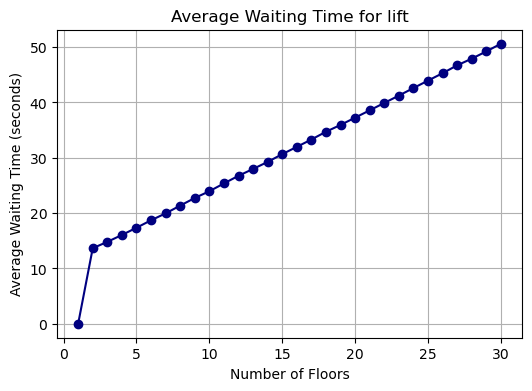

In [41]:
average_waiting_times = [simulate_optimized_waiting_time(num_floors) for num_floors in num_floors_range]

# Plotting the results
plt.figure(figsize=(6, 4))
plt.plot(num_floors_range, average_waiting_times, marker='o', color = 'navy')
plt.xlabel('Number of Floors')
plt.ylabel('Average Waiting Time (seconds)')
plt.title('Average Waiting Time for lift')
plt.grid(True)
#plt.legend()
plt.show()

## changing params

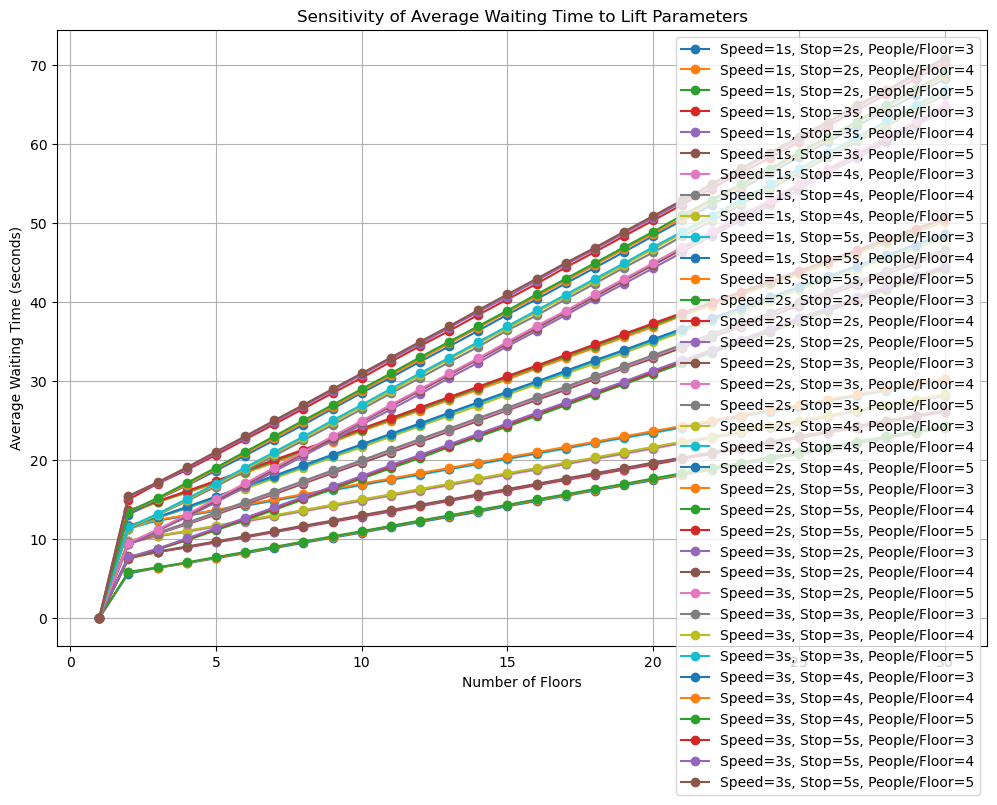

In [48]:
# Parameters
num_simulations = 10000               # Number of simulations to run
num_floors_range = range(1, 31, 1)   # Number of floors in the building
lift_speed_range = np.arange(1, 4, 1) # Time (in seconds) to move between adjacent floors
stop_time_range = np.arange(2, 6, 1)  # Time (in seconds) for the lift to stop and open/close doors
people_per_floor_range = np.arange(3, 6, 1)  # Number of people per floor waiting for lift

max_people_per_floor = max(people_per_floor_range) * max(num_floors_range)

@njit
def simulate_optimized_waiting_time(num_floors, lift_speed, stop_time, people_per_floor):
    total_waiting_times = np.zeros(num_simulations)
    
    for sim in range(num_simulations):
        # Number of people on each floor increases with number of floors
        total_people = num_floors * people_per_floor
        people_on_floors = np.random.poisson(total_people / num_floors, num_floors)
        
        upward_requests = np.zeros((num_floors * max_people_per_floor, 2), dtype=np.int32)
        downward_requests = np.zeros((num_floors * max_people_per_floor, 2), dtype=np.int32)
        
        up_count = 0
        down_count = 0

        # Generating destination floors for each person
        for i in range(num_floors):
            dest_floors = np.random.randint(1, num_floors + 1, size=people_on_floors[i])
            for dest_floor in dest_floors:
                if dest_floor > i + 1:  # Going up
                    upward_requests[up_count, 0] = i + 1
                    upward_requests[up_count, 1] = dest_floor
                    up_count += 1
                elif dest_floor < i + 1:  # Going down
                    downward_requests[down_count, 0] = i + 1
                    downward_requests[down_count, 1] = dest_floor
                    down_count += 1
        
        # Serving upward requests first, then downward requests
        current_floor = 0
        total_waiting_time = 0
        
        # Processing upward requests
        for j in range(up_count):
            start, dest = upward_requests[j]
            travel_time = abs(start - current_floor) * lift_speed
            total_waiting_time += travel_time + stop_time
            travel_time = abs(dest - start) * lift_speed
            total_waiting_time += travel_time + stop_time
            current_floor = dest
        
        # Processing downward requests
        for j in range(down_count - 1, -1, -1):
            start, dest = downward_requests[j]
            travel_time = abs(start - current_floor) * lift_speed
            total_waiting_time += travel_time + stop_time
            travel_time = abs(dest - start) * lift_speed
            total_waiting_time += travel_time + stop_time
            current_floor = dest
        
        # Average waiting time 
        if up_count + down_count > 0:
            avg_waiting_time = total_waiting_time / (up_count + down_count)
        else:
            avg_waiting_time = 0
        
        total_waiting_times[sim] = avg_waiting_time
    
    # Average waiting time across all simulations
    return np.mean(total_waiting_times)

# Parameter sensitivity analysis
results = []
for lift_speed in lift_speed_range:
    for stop_time in stop_time_range:
        for people_per_floor in people_per_floor_range:
            avg_waiting_times = []
            for num_floors in num_floors_range:
                avg_waiting_time = simulate_optimized_waiting_time(num_floors, lift_speed, stop_time, people_per_floor)
                avg_waiting_times.append(avg_waiting_time)
            
            # Store results
            results.append((lift_speed, stop_time, people_per_floor, num_floors_range, avg_waiting_times))

# Plotting the results
plt.figure(figsize=(12, 8))

for lift_speed, stop_time, people_per_floor, num_floors_range, avg_waiting_times in results:
    plt.plot(num_floors_range, avg_waiting_times, marker='o', label=f'Speed={lift_speed}s, Stop={stop_time}s, People/Floor={people_per_floor}')

plt.xlabel('Number of Floors')
plt.ylabel('Average Waiting Time (seconds)')
plt.title('Sensitivity of Average Waiting Time to Lift Parameters')
plt.grid(True)
plt.legend()
plt.show()

## Time-step approach

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [44:12<00:00, 13.26s/it]


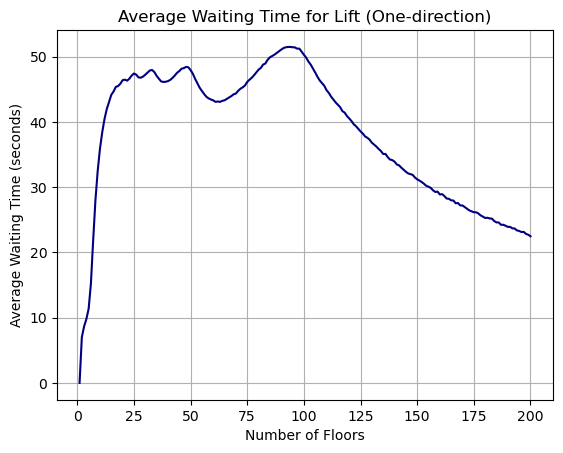

Time taken to run the code: 2652.675028324127 seconds


In [21]:
start_time = time.time()

# Simulation parameters
max_floors = 200  # Maximum number of floors to simulate
elevator_capacity = 10
elevator_speed = 2  # Time to move one floor
door_time = 5  # Time to open/close doors
lambda_p = 0.1  # Lambda for Poisson distribution (average number of arrivals per time step)
max_people_per_floor = 10  # Max number of people waiting per floor
time_steps = 120  # Total number of time steps
num_simulations = 100000  # Number of simulations to run and average over

@njit
def run_simulation(num_floors):
    # Arrays to store people waiting and elevator passengers
    people_waiting = np.zeros((num_floors, max_people_per_floor, 2), dtype=np.int32)  # (destination, arrival_time)
    num_waiting = np.zeros(num_floors, dtype=np.int32)  # Number of people waiting per floor
    elevator_position = 1  # Start elevator at floor 1
    elevator_passengers = np.zeros((elevator_capacity, 2), dtype=np.int32)  # (destination, arrival_time)
    num_passengers = 0  # Number of passengers in the elevator
    waiting_times = np.zeros(time_steps * num_floors * max_people_per_floor, dtype=np.int32)  # To store waiting times
    waiting_time_count = 0  # Counter for recorded waiting times
    elevator_direction = 1  # 1 for upward, -1 for downward

    for t in range(time_steps):
        # Checking for new arrivals using Poisson distribution
        for floor in range(num_floors):
            arrivals = np.random.poisson(lambda_p)
            for _ in range(arrivals):
                if num_waiting[floor] < max_people_per_floor:
                    destination = np.random.randint(1, num_floors + 1)
                    if destination != (floor + 1):  # Avoid choosing the current floor as destination
                        arrival_time = t
                        people_waiting[floor, num_waiting[floor], 0] = destination
                        people_waiting[floor, num_waiting[floor], 1] = arrival_time
                        num_waiting[floor] += 1

        # Load people into the elevator at the current floor
        if num_passengers < elevator_capacity:
            while num_passengers < elevator_capacity and num_waiting[elevator_position - 1] > 0:
                elevator_passengers[num_passengers] = people_waiting[elevator_position - 1, 0]
                num_passengers += 1
                num_waiting[elevator_position - 1] -= 1
                people_waiting[elevator_position - 1, :-1] = people_waiting[elevator_position - 1, 1:]  # Shift the queue

        # Moving the elevator and dropping off passengers
        if num_passengers > 0:
            destination = elevator_passengers[0, 0]
            
            if elevator_direction == 1 and elevator_position < num_floors:  # Moving up
                elevator_position += 1
            elif elevator_direction == -1 and elevator_position > 1:  # Moving down
                elevator_position -= 1

            # Drop passengers if elevator reaches their destination
            if elevator_position == destination:
                to_drop = 0
                for i in range(num_passengers):
                    if elevator_passengers[i, 0] == elevator_position:
                        waiting_time = t - elevator_passengers[i, 1]
                        waiting_times[waiting_time_count] = waiting_time
                        waiting_time_count += 1
                        to_drop += 1

                if to_drop > 0:
                    elevator_passengers[:num_passengers - to_drop] = elevator_passengers[to_drop:num_passengers]
                    num_passengers -= to_drop

            # Reverse direction at the topmost or bottommost floor
            if elevator_position == num_floors:
                elevator_direction = -1  # Start moving down
            elif elevator_position == 1:
                elevator_direction = 1  # Start moving up

        t += elevator_speed + door_time  # Update time for each movement and door operation

    # Calculate and return the average waiting time
    average_waiting_time = np.mean(waiting_times[:waiting_time_count]) if waiting_time_count > 0 else 0
    return average_waiting_time

# Running simulations for each number of floors and averaging the results
floor_range = np.arange(1, max_floors + 1)
average_waiting_times = np.zeros(max_floors)

for num_floors in tqdm(range(1, max_floors + 1)):
    waiting_times = np.zeros(num_simulations)
    for i in range(num_simulations):
        waiting_time = run_simulation(num_floors)
        waiting_times[i] = waiting_time
    average_waiting_times[num_floors - 1] = np.mean(waiting_times)

# Plotting the results
plt.plot(floor_range, average_waiting_times, color='navy')
plt.xlabel('Number of Floors')
plt.ylabel('Average Waiting Time (seconds)')
plt.title('Average Waiting Time for Lift (One-direction)')
plt.grid(True)
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to run the code: {elapsed_time} seconds")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [06:56<00:00,  2.08s/it]


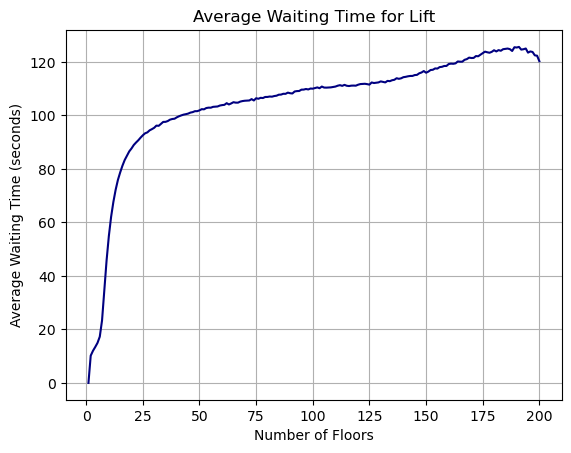

Time taken to run the code: 416.32544565200806 seconds


In [20]:
start_time = time.time()

# Simulation parameters
max_floors = 200  # Maximum number of floors to simulate
elevator_capacity = 10
elevator_speed = 2  # time to move one floor
door_time = 5  # time to open/close doors
lam = 0.1  # Lambda for Poisson distribution (average number of arrivals per floor per time step)
max_people_per_floor = 10
time_steps = 120
num_simulations = 10000  # Number of simulations to average over

@njit
def run_simulation(num_floors):
    # Using arrays to store people waiting and elevator passengers
    people_waiting = np.zeros((num_floors, max_people_per_floor, 2), dtype=np.int32)  # (destination, arrival_time)
    num_waiting = np.zeros(num_floors, dtype=np.int32)  # number of people waiting per floor
    elevator_position = 1  # Start at floor 1
    elevator_passengers = np.zeros((elevator_capacity, 2), dtype=np.int32)  # (destination, arrival_time)
    num_passengers = 0
    waiting_times = np.zeros(time_steps * num_floors * max_people_per_floor, dtype=np.int32)
    waiting_time_count = 0

    for t in range(time_steps):
        # Checking for new arrivals 
        for floor in range(num_floors):
            arrivals = np.random.poisson(lam)  # Poisson-distributed number of arrivals
            for _ in range(arrivals):
                if num_waiting[floor] < max_people_per_floor:
                    destination = np.random.randint(1, num_floors + 1)
                    if destination != (floor + 1):  # Avoid choosing the current floor as destination
                        arrival_time = t
                        people_waiting[floor, num_waiting[floor], 0] = destination
                        people_waiting[floor, num_waiting[floor], 1] = arrival_time
                        num_waiting[floor] += 1

        # Loading people into the elevator at the current floor
        if num_passengers < elevator_capacity:
            while num_passengers < elevator_capacity and num_waiting[elevator_position - 1] > 0:
                elevator_passengers[num_passengers] = people_waiting[elevator_position - 1, 0]
                num_passengers += 1
                num_waiting[elevator_position - 1] -= 1
                # Shift people waiting queue on that floor
                people_waiting[elevator_position - 1, :-1] = people_waiting[elevator_position - 1, 1:]

        # Moving the elevator and dropping passengers
        if num_passengers > 0:
            destination = elevator_passengers[0, 0]
            if elevator_position < destination:
                elevator_position += 1
            elif elevator_position > destination:
                elevator_position -= 1
            else:
                # Dropping off passengers at the current floor
                to_drop = 0
                for i in range(num_passengers):
                    if elevator_passengers[i, 0] == elevator_position:
                        waiting_time = t - elevator_passengers[i, 1]
                        waiting_times[waiting_time_count] = waiting_time
                        waiting_time_count += 1
                        to_drop += 1

                # Shifting passengers array
                if to_drop > 0:
                    elevator_passengers[:num_passengers - to_drop] = elevator_passengers[to_drop:num_passengers]
                    num_passengers -= to_drop

        t += elevator_speed + door_time

    # Calculate and return the average waiting time
    average_waiting_time = np.mean(waiting_times[:waiting_time_count]) if waiting_time_count > 0 else 0
    return average_waiting_time

# Running simulations for each number of floors and averaging the results
floor_range = np.arange(1, max_floors + 1)
average_waiting_times = np.zeros(max_floors)

for num_floors in tqdm(range(1, max_floors + 1)):
    waiting_times = np.zeros(num_simulations)
    for i in range(num_simulations):
        waiting_time = run_simulation(num_floors)
        waiting_times[i] = waiting_time
    average_waiting_times[num_floors - 1] = np.mean(waiting_times)

# Plotting the results
plt.plot(floor_range, average_waiting_times, color='navy')
plt.xlabel('Number of Floors')
plt.ylabel('Average Waiting Time (seconds)')
plt.title('Average Waiting Time for Lift')
plt.grid(True)
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to run the code: {elapsed_time} seconds")